In [1]:
import hyperspy.api as hs
import pyEELSMODEL.api as em
import numpy as np
from pyEELSMODEL.components.linear_background import LinearBG
from pyEELSMODEL.components.CLedge.zezhong_coreloss_edgecombined import ZezhongCoreLossEdgeCombined
from pyEELSMODEL.components.CLedge.kohl_coreloss_edgecombined import KohlLossEdgeCombined
from pyEELSMODEL.components.MScatter.mscatterfft import MscatterFFT
from pyEELSMODEL.components.MScatter.mscatter import Mscatter
from pyEELSMODEL.components.gdoslin import GDOSLin
from pyEELSMODEL.fitters.linear_fitter import LinearFitter

s = hs.load("testU.hspy").isig[:830.]


WARNING | Hyperspy | This file contains a signal provided by the exspy Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing exspy to load this dataset into its original signal class. (hyperspy.io:800)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)


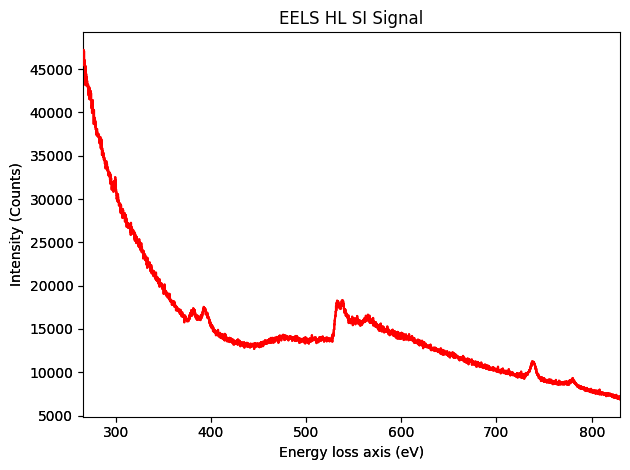

In [2]:
s.plot()

In [3]:
hl = em.MultiSpectrum.from_numpy(np.array(4*[s.data]).reshape((2,2,-1)),s.axes_manager[-1].axis) #convert single spectrum to SI for testing purposes

In [4]:

edges = [("U","N"),("O","K")]
E0 = 300e3 
alpha = 20e-3
beta = 92e-3

comp_elems = []

for elem,edge in edges:
    comp = KohlLossEdgeCombined(hl.get_spectrumshape(), 1, E0, alpha,beta, elem, edge,fast=True)
    comp_elems.append(comp)


bg = LinearBG(specshape=hl.get_spectrumshape(), rlist=np.linspace(1,4,4))

fine_structure = GDOSLin(hl.get_spectrumshape(),725,60,30,interpolationtype="linear")

mod = em.Model(hl.get_spectrumshape(), components=comp_elems+[bg,fine_structure])

N6 is used
N5 is used
N4 is used
N3 is used
N2 is used
N1 is used


In [5]:
fit = LinearFitter(hl, mod, method="ols",use_weights=True)

In [6]:
fit.perform_fit()

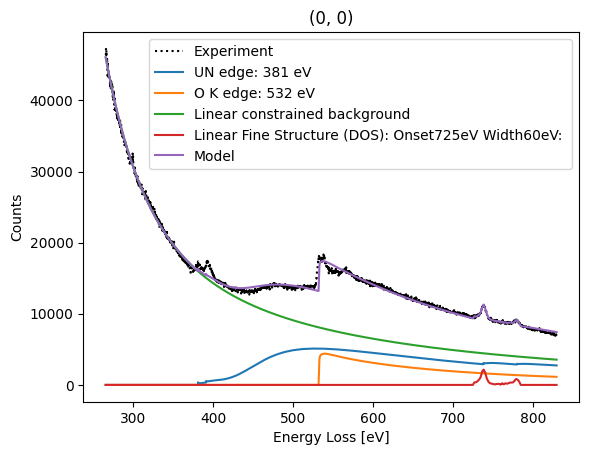

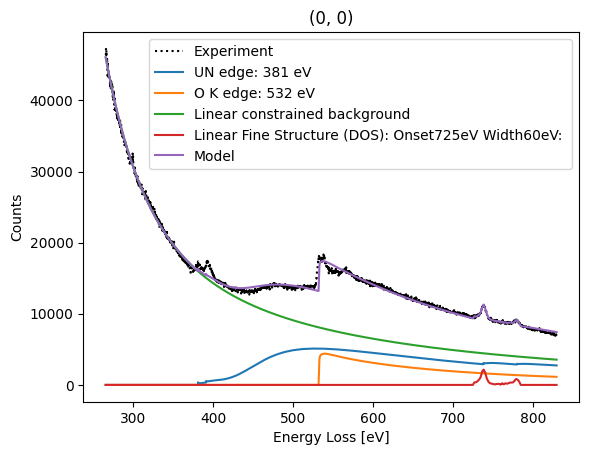

In [7]:
fit.plot()

In [8]:
fit.multi_fit()

100%|██████████| 4/4 [00:00<00:00, 255.81it/s]


# My goal:

U_N45 = fit.model_to_multispectrum_with_comps( [xsection_U_N5, xsection_U_N4,GDOSlin_UN45] )

In [9]:
print("comps")
for i,c in enumerate(fit.model.components):
    print(i,c.name)
print("U xsections:")
U = fit.model.components[0]
for i,x in enumerate(U.xsectionlist):
    print(i,x.name)

comps
0 UN edge: 381 eV
1 O K edge: 532 eV
2 Linear constrained background
3 Linear Fine Structure (DOS): Onset725eV Width60eV: 
U xsections:
0 U N7 edge381 eV
1 U N6 edge391 eV
2 U N5 edge738 eV
3 U N4 edge780 eV
4 U N3 edge1045 eV
5 U N2 edge1273 eV
6 U N1 edge1441 eV


In [10]:
%matplotlib qt

In [26]:
#show the full model

m1 =fit.model_to_multispectrum()
em.MultiSpectrumVisualizer([m1])


100%|██████████| 4/4 [00:00<00:00, 1002.40it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
# remove parts from the model before converting to multispectrum
U = fit.model.components[0]
O = fit.model.components[1]
xs_UN4 = U.xsectionlist[3]
xs_UN5 = U.xsectionlist[2]

U_N45 =fit.model_to_multispectrum_without_comps([bg,fine_structure,xs_UN4,xs_UN5])
em.MultiSpectrumVisualizer([U_N45])

100%|██████████| 4/4 [00:00<00:00, 15.44it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


subcomponent is suppressed, to unset call setsuppress(False) on the specific subcomponent: U N5 edge738 eV
subcomponent is suppressed, to unset call setsuppress(False) on the specific subcomponent: U N4 edge780 eV


In [30]:
# or include only specific components when converting to multispectrum
m3 =fit.model_to_multispectrum_with_comps([bg,O,fine_structure])
em.MultiSpectrumVisualizer([m3])

100%|██████████| 4/4 [00:00<00:00, 930.77it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
#or suppress the individual components yourself, but don't forget to switch them back to unsuppressed
xs_UN4.setsuppress(True)
xs_UN5.setsuppress(False)
U.calculate()
U.plot()


subcomponent is suppressed, to unset call setsuppress(False) on the specific subcomponent: U N4 edge780 eV
